# Part 1 : TensorFlow ---------------------------------------------------------

In [2]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tn

# Step 1 : import the dataset

In [3]:

data = pd.read_csv('diabetes.csv')
data.columns

Index(['-0.294118', '0.487437', '0.180328', '-0.292929', '0', '0.00149028',
       '-0.53117', '-0.0333333', '0.1'],
      dtype='object')

In [4]:
# We dont have column names, so adding header to them
data = data.set_axis(['fr1','fr2','fr3','fr4','fr5','fr6','fr7','fr9','target'],axis=1)

# Step 2: Preprocessing the Data & Visualization

In [5]:
data.head()

,fr1,fr2,fr3,fr4,fr5,fr6,fr7,fr9,target
0,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
1,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
2,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
3,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0
4,-0.411765,0.165829,0.213115,0.000000,0.000000,-0.236960,-0.894962,-0.700000,1


In [6]:
data.describe()

,fr1,fr2,fr3,fr4,fr5,fr6,fr7,fr9,target
count,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000
mean,-0.407807,0.218208,0.176500,-0.289731,-0.323961,-0.032289,-0.663427,-0.516799,0.654354
std,0.386493,0.306465,0.201420,0.258651,0.375608,0.205508,0.283202,0.400674,0.475893
min,-0.882353,-0.557789,-0.606557,-0.858586,-0.966903,-0.457526,-0.994876,-0.966667,0.000000
25%,-0.764706,-0.005025,0.016393,-0.494949,-0.716312,-0.179583,-0.858241,-0.866667,0.000000
50%,-0.529412,0.165829,0.180328,-0.292929,0.000000,-0.034277,-0.748506,-0.633333,1.000000
75%,0.000000,0.407035,0.311475,0.000000,0.000000,0.087929,-0.532451,-0.233333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# to check is is there any duplicate rows
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

fr1       0
fr2       0
fr3       0
fr4       0
fr5       0
fr6       0
fr7       0
fr9       0
target    0
dtype: int64

In [9]:
data.shape

(758, 9)

array([[<Axes: title={'center': 'fr1'}>, <Axes: title={'center': 'fr2'}>,
        <Axes: title={'center': 'fr3'}>],
       [<Axes: title={'center': 'fr4'}>, <Axes: title={'center': 'fr5'}>,
        <Axes: title={'center': 'fr6'}>],
       [<Axes: title={'center': 'fr7'}>, <Axes: title={'center': 'fr9'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

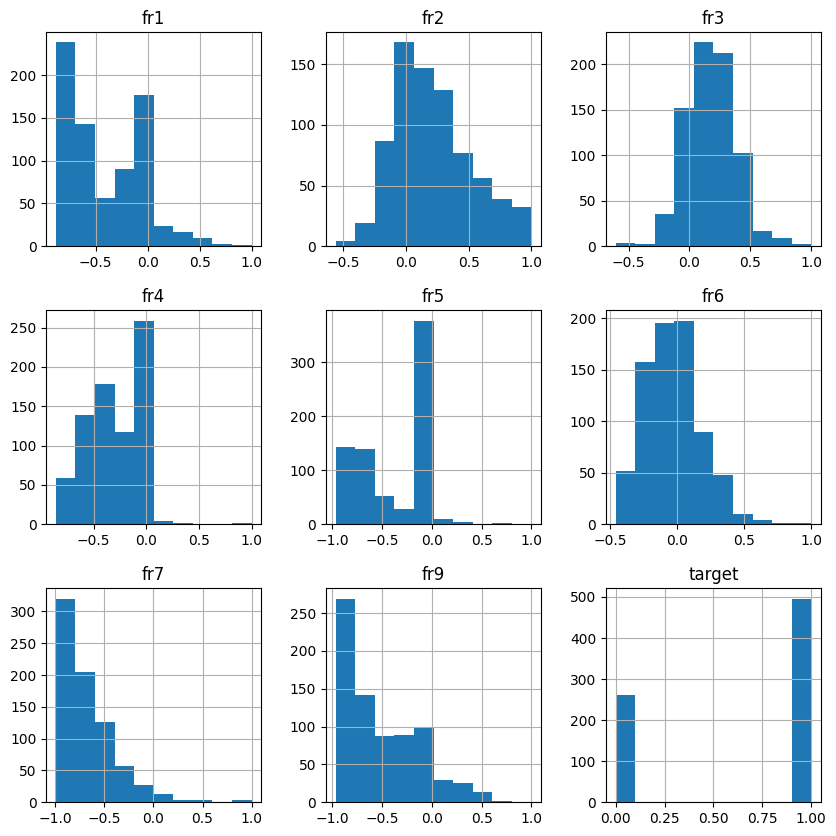

In [10]:
# visualizations of each data field
data.hist(figsize=(10,10))

<Axes: >

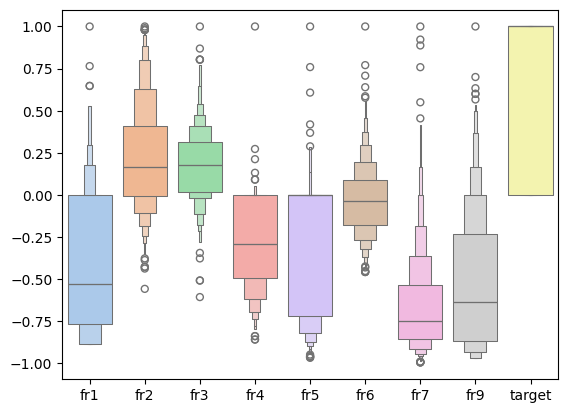

In [11]:
# Box plot to identify outliers
import seaborn as sns
sns.boxenplot(data=data,palette='pastel')

<Axes: >

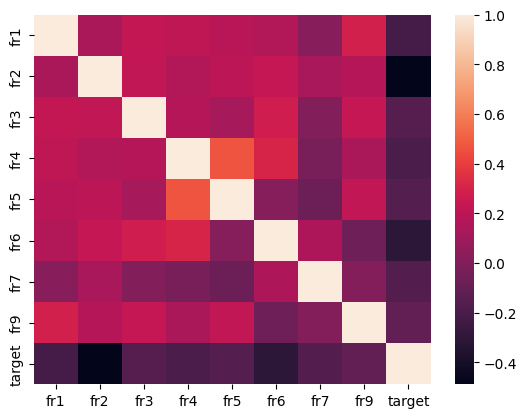

In [12]:
# heapMap to check Correlation of data points 
sns.heatmap(data.corr())

# Step 3: Split into 70% train 30% test

In [13]:
# Data needs to be scaled.

from sklearn.model_selection import train_test_split

x = data.drop(columns=['target'])
y = data['target']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_trained_scaled  = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [15]:
x_trained_scaled

array([[-0.01924968, -0.22083283,  0.34204625, ..., -0.19423045,
        -0.37066807,  0.70479237],
       [-1.23740727, -1.4535344 , -1.27872991, ...,  0.11026748,
         2.3178001 , -0.97630421],
       [ 0.28528972, -1.19401862,  0.50412426, ..., -0.19423045,
        -0.2551938 ,  0.53668195],
       ...,
       [-1.23740727, -0.72364506, -1.92704097, ..., -1.1367224 ,
        -0.97172368, -1.14441462],
       [ 1.04663951, -0.57766751,  0.34204625, ..., -2.05021917,
         0.3369789 , -0.72413985],
       [-0.62832848,  1.88773208, -0.63042034, ...,  0.21176676,
        -0.5838508 , -0.8081938 ]])

# Step 4: Modify the model 

In [16]:
# Now we will apply Keras for 

import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [17]:
# Creating Object 
model = Sequential()

In [18]:
model.add(Dense(3,activation='sigmoid',input_dim = 8)) # First Hidden Layer
model.add(Dense(1,activation='sigmoid')) # Output Layer

# Here, we can see how many weights and bias are given to each layer
model.summary()

# for better performance and acuracy while compile time we will declare loss_function and Optimizers
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            27 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

# Step 5:  Train the model on the data

In [19]:
# we willl store all the values of 'accuracy' & 'loss' in a variable to plot graph of loss and Accuracy
acc_loss_model = model.fit(x_trained_scaled,y_train,epochs=20, validation_split=0.2)

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7339 - loss: 0.6266 - val_accuracy: 0.6509 - val_loss: 0.6397
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7007 - loss: 0.6292 - val_accuracy: 0.6509 - val_loss: 0.6358
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7364 - loss: 0.6146 - val_accuracy: 0.6415 - val_loss: 0.6321
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7427 - loss: 0.5990 - val_accuracy: 0.6415 - val_loss: 0.6287
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7089 - loss: 0.6105 - val_accuracy: 0.6415 - val_loss: 0.6253
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6812 - loss: 0.6127 - val_accuracy: 0.6415 - val_loss: 0.6221
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7112 - loss: 0.6014 - val_accuracy: 0.6415 - val_loss: 0.6190
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7665 - loss: 0.5732 - val_accuracy: 0.6415 - val_loss:

# Step 6 : Model is ready for prediction

In [20]:
y_pred_data = model.predict(x_test_scaled)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


# Step 7: Accuracy Calculation

In [21]:
from sklearn.metrics import accuracy_score

# Now, This is out task to convert prediction value in 0 & 1. for that we will apply condition, 
# if probability is > 0.5 then 1 (cutomer will leave the bank) , other wise 0 (cutomer will not leave the bank) 

y_final_pred = np.where(y_pred_data>0.5, 1, 0)
Accuracy = accuracy_score(y_test,y_final_pred)

print('Accuracy of the ANN is : ',  Accuracy*100,'%')

Accuracy of the ANN is :  74.56140350877193 %


# Difference of loss_value between training and testing phase

In [22]:
acc_loss_model.history

{'accuracy': [0.7311320900917053,
  0.7334905862808228,
  0.7311320900917053,
  0.7193396091461182,
  0.7122641801834106,
  0.7193396091461182,
  0.7193396091461182,
  0.7216981053352356,
  0.7169811129570007,
  0.7169811129570007,
  0.7169811129570007,
  0.7169811129570007,
  0.7264150977134705,
  0.7264150977134705,
  0.7264150977134705,
  0.7287735939025879,
  0.7311320900917053,
  0.7334905862808228,
  0.7382075190544128,
  0.7382075190544128],
 'loss': [0.6238313913345337,
  0.6188867688179016,
  0.6145766377449036,
  0.6101529002189636,
  0.6058984994888306,
  0.6018369197845459,
  0.5979766249656677,
  0.594474732875824,
  0.5908633470535278,
  0.5873963236808777,
  0.5841320157051086,
  0.581082284450531,
  0.5781790614128113,
  0.5753002762794495,
  0.5727858543395996,
  0.5702087879180908,
  0.5676966905593872,
  0.5652104020118713,
  0.5629135370254517,
  0.5607925057411194],
 'val_accuracy': [0.650943398475647,
  0.650943398475647,
  0.6415094137191772,
  0.6415094137191772

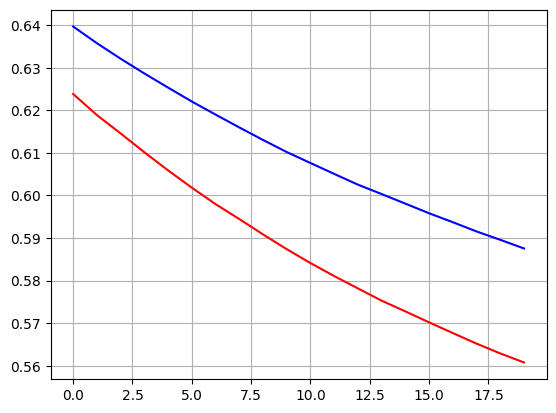

In [23]:
plt.plot(acc_loss_model.history['loss'],color='Red')
plt.plot(acc_loss_model.history['val_loss'],color='blue')
plt.grid()


